In [ ]:
#Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Extraindo arquivo CSV
data_set = pd.read_csv("dataset.csv")
data_set.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
#Verificando atributos
data_set.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [7]:
#Convertendo Data_Pedido em datetime
data_set["Data_Pedido"] = pd.to_datetime(data_set["Data_Pedido"], dayfirst = True)
data_set.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [8]:
#Criando colunas Ano e Mês
data_set["Mes"] = data_set["Data_Pedido"].dt.month
data_set["Ano"] = data_set["Data_Pedido"].dt.year

data_set.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Mes,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,6,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016


In [13]:
#Agrupando média de vendas por segmento, ano e mês.
data_set_media_segmento_ano_mes = data_set.groupby(["Segmento", "Ano", "Mes"])["Valor_Venda"].mean().reset_index()
data_set_media_segmento_ano_mes.head(20)

,Segmento,Ano,Mes,Valor_Venda
0,Consumer,2015,1,146.736787
1,Consumer,2015,2,117.327926
2,Consumer,2015,3,152.170564
3,Consumer,2015,4,189.762750
4,Consumer,2015,5,191.337439
5,Consumer,2015,6,280.348963
6,Consumer,2015,7,275.812286
7,Consumer,2015,8,195.232044
8,Consumer,2015,9,376.404026
9,Consumer,2015,10,228.826718


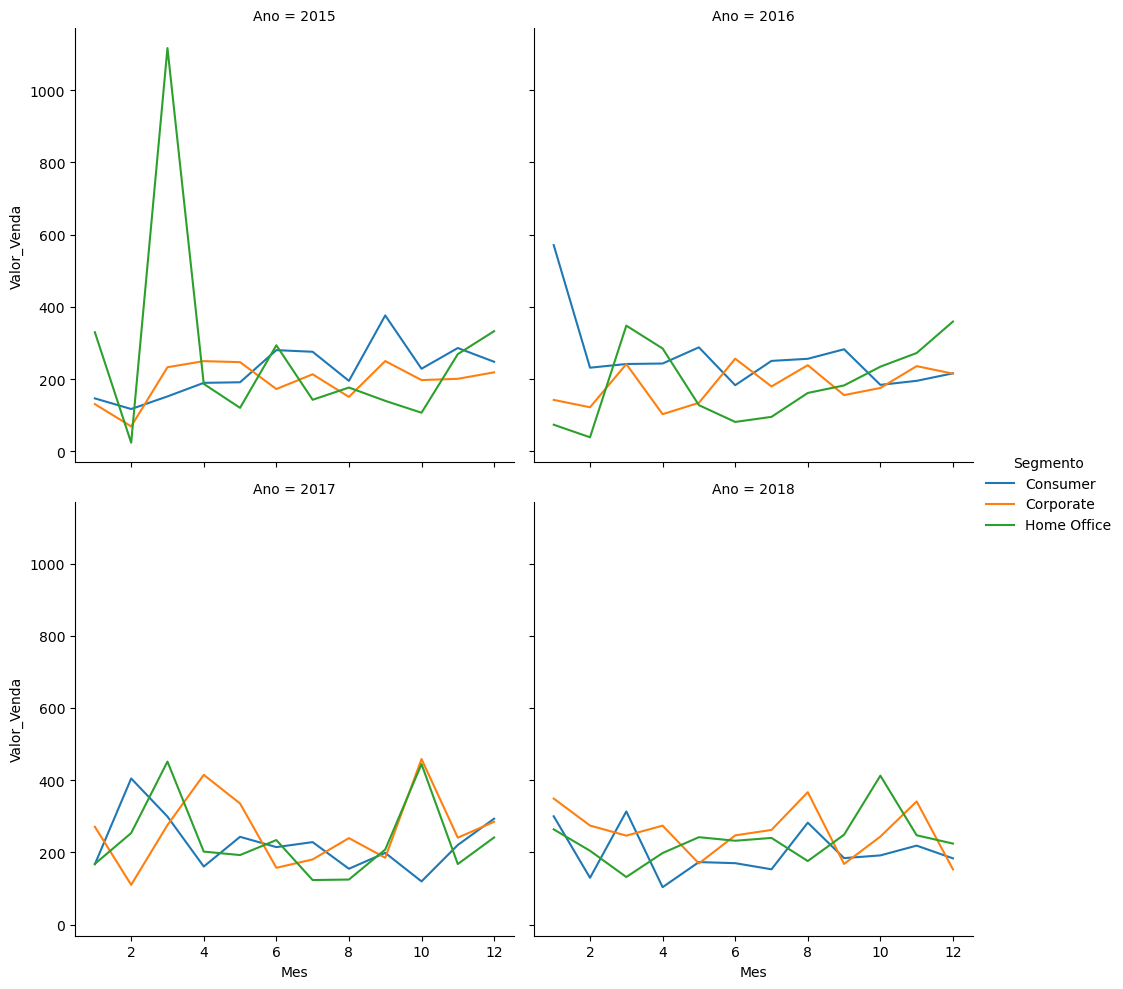

In [14]:
#Definindo parâmetros
eixo_x = data_set_media_segmento_ano_mes["Mes"]
eixo_y = data_set_media_segmento_ano_mes["Valor_Venda"]
preenchimento = data_set_media_segmento_ano_mes["Segmento"]
coluna = data_set_media_segmento_ano_mes["Ano"]

#Construindo o gráfico.
sns.relplot(kind = "line", data = data_set_media_segmento_ano_mes, x = eixo_x, y = eixo_y, hue = preenchimento, col = coluna, 
           col_wrap = 2)
plt.show()